<a href="https://colab.research.google.com/github/Asleik/dice-roller/blob/main/dice_roller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dice Roller

[GitHub](https://github.com/Asleik/dice-roller)



#### Imports

In [3]:
import random
from abc import abstractmethod
import re

##  Objective

My objective is to create a program that generate dices from user input, roll them and show theirs value. For some special dices, like D4, D6 and D8, I want to print them ASCII-like. 

---



## Project Thinking



### DN class

We need a "general dice" `DN` that accepts any given number of sides.
> DN means Dice "aNy number of sides"

In [4]:
class DN:
    def __init__(self, sides):
        self.__sides = sides
        self.__value = random.randrange(1, int(self.__sides) + 1)  

    @property
    def value(self):
        return self.__value

    @property
    def sides(self):
        return self.__sides

    def __str__(self):
        return str(f'd{self.__sides}: {self.__value}')

    @abstractmethod
    def __special_print(self):
        """Used for a graphical print"""
        pass

* The `dice` `value` is random.
> For more information on [Random](https://docs.python.org/3/library/random.html#module-random).

* The __sides and __values starts with double underscore. This means they are considered private. One should not mess with then directly. Those `@property` methods are the `Getter` methods. 
> For more information about `getters`, `setters`, `private atributes` and `private methods` , look for [Encapsulation](https://en.wikipedia.org/wiki/Encapsulation_(computer_programming)).

* This `__str__` function is a override of this `dunder method`. It returns the string representation of a object. 
> For more information on [Dunder or Magic Methods](https://docs.python.org/3/reference/datamodel.html#special-method-names).  

* That `@abstractmethod` means it must be implemented in the classes that inherit this one. It acts like an `interface`.
> For more information on  [Interface](https://en.wikipedia.org/wiki/Interface_(computing))

---

### D4 class

Has the same atributes of DN, but is 4-sided and pyramid-shaped.

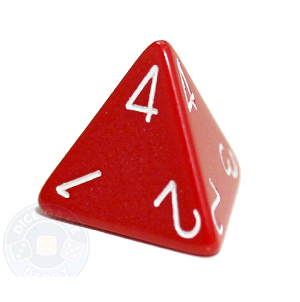

In [5]:
class D4(DN):
    def __init__(self):
        super().__init__(4)

    def __str__(self):
        return str(f'd4: \n{self.__special_print()}')

    def __special_print(self):
        values = list(range(1, 5))
        a = str(self.value)
        values.remove(self.value)
        b = str(values.pop())
        c = str(values.pop())

        return '     /\\\n' \
               '    /a \\\n' \
               '   /    \\\n' \
               '  /      \\\n' \
               ' /        \\\n' \
               '/ b      c \\\n' \
               '------------\n'\
            .replace('a', a)\
            .replace('b', b)\
            .replace('c', c)

* This super() method is used to inherit its father atributes. It means that D4 have `value` and `sides`. It is used for code reuse.
> For more information, look for  [Inheritance](https://en.wikipedia.org/wiki/Inheritance_(object-oriented_programming)).
>
> Remember, a lot of CTRL+C and CTRL+V in your code may suggest [Code Smells](https://en.wikipedia.org/wiki/Code_smell).

* Explaining `__special_print` method:  
I used [`range`](https://docs.python.org/3/library/stdtypes.html#range) to return 1, 2, 3, 4 and created a [`list`](https://docs.python.org/3/library/stdtypes.html#list) with this. These are the only possible values for a D4.  
The `dice` `value` is stored in `a` variable. Then I it remove from this `list`.  
For the bottom values, I just remove the last item, `.pop()`,  of the `list` and store then in `b` and `c` variables.  
Finally, just replace `a`, `b` and `c` in the drawing string. 
> For more information, look for [String Methods](https://docs.python.org/3/library/stdtypes.html#string-methods)

* The `__str__` just calls the `__special_print` method.
> For more information, look for [Build in Functions](https://docs.python.org/3/library/functions.html#built-in-functions).


---






### D6 class

Has the same atributes of DN and is most known kind of dice, the 6-sided one.



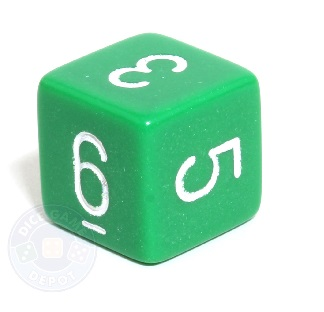

In [6]:
class D6(DN):
    def __init__(self):
        super().__init__(6)

    def __str__(self):
        return str(f'd6: \n{self.__special_print()}')

    def __special_print(self):
        all_dots = list('abcdefghijl')
        dice_number = list(range(1, 7))
        dice_dots = ['f', 'bj', 'afl', 'bhdj', 'agfel', 'acegil']
        map_of_dots = dict(zip(dice_number, dice_dots))

        dice_string = ' --------- \n' + \
                      '| a     g |\n' + \
                      '| b     h |\n' + \
                      '| c  f  i |\n' + \
                      '| d     j |\n' + \
                      '| e     l |\n' + \
                      ' --------- \n'

        # dots to paint
        for i in map_of_dots[self.value]:
            dice_string = dice_string.replace(i, 'o')
            all_dots.remove(i)

        for i in all_dots:
            dice_string = dice_string.replace(i, ' ')

        return dice_string

#### __special_print

I'll break the __special_print method in many cells so you can better understand the process.

> For more information, look for [Dictionaries](https://docs.python.org/3/tutorial/datastructures.html#dictionaries),  [Zip Method (Build In)](https://docs.python.org/3/library/functions.html#zip) and [Looping over Dict](https://docs.python.org/3/tutorial/datastructures.html#looping-techniques).

In [7]:
dice_string = ' --------- \n' + \
                '| a     g |\n' + \
                '| b     h |\n' + \
                '| c  f  i |\n' + \
                '| d     j |\n' + \
                '| e     l |\n' + \
                ' --------- \n'

print(dice_string)

 --------- 
| a     g |
| b     h |
| c  f  i |
| d     j |
| e     l |
 --------- 



In [8]:
# list created with all possible spots for dot
all_dots = list('abcdefghijl')

# list with all possible D6 values (1 to 6)
dice_number = list(range(1, 7))

# letters that I will change to a dot, accordingly to the dice value.
# If value is 1, I just one one dot in 'f' position.
# If value is 2, I want two dots, one in 'b' and another in 'j' position.
dice_dots = ['f', 'bj', 'afl', 'bhdj', 'agfel', 'acegil']

In [9]:
# combine 2 lists into a dictionary.
# by using this, I wont use A BIG NESTED IF-ELIF-ELSE 
map_of_dots = dict(zip(dice_number, dice_dots))

print(map_of_dots.items(), '\n')
for k, v in map_of_dots.items():
    print(k, ':', v)

dict_items([(1, 'f'), (2, 'bj'), (3, 'afl'), (4, 'bhdj'), (5, 'agfel'), (6, 'acegil')]) 

1 : f
2 : bj
3 : afl
4 : bhdj
5 : agfel
6 : acegil


In [10]:
# lets assume that the dice value is 5
dice_value = 5

# for each LETTER in map_of_dots[5] 'agfel'
# replace this letter for an 'o' in dice_string
# and remove this same letter from all_dots list
for i in map_of_dots[dice_value]:
    dice_string = dice_string.replace(i, 'o')
    all_dots.remove(i)

# for each item (letter) in all_dots list
# replace it for a white space character in dice_string
for i in all_dots:
    dice_string = dice_string.replace(i, ' ')

print(dice_string)

 --------- 
| o     o |
|         |
|    o    |
|         |
| o     o |
 --------- 



### D8 class

Has the same atributes of DN and is a 8-sided double-pyramid-shaped dice.

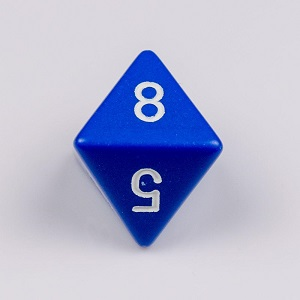

In [11]:
class D8(DN):
    def __init__(self):
        super().__init__(8)

    def __str__(self):
        return str(f'd8: \n{self.__special_print()}')

    def __special_print(self):
        up_value = list(range(1, 9))
        down_value = [5, 6, 7, 8, 1, 2, 3, 4]
        map_of_dots = dict(zip(up_value, down_value))

        dice_string = '  /\\\n' \
                      ' /  \\\n' \
                      '/  a \\\n' \
                      '------\n' \
                      '\\ b  /\n' \
                      ' \\  /\n' \
                      '  \\/\n'

        dice_string = dice_string.replace('a', str(self.value)) \
                                 .replace('b', str(map_of_dots[self.value]))

        return dice_string

### Dice class

I choosed to make this class so the responsability of choosing which type of dice will be created will not rest on Board class.

> For more information, look for  [Single-responsibility principle](https://en.wikipedia.org/wiki/Single-responsibility_principle) and [Factory](https://en.wikipedia.org/wiki/Factory_method_pattern).

In [12]:
class Dice:
    """This class is a Factory"""
    @staticmethod
    def creator(dice_type):
        if dice_type == 4:
            return D4()
        if dice_type == 6:
            return D6()
        if dice_type == 8:
            return D8()
        return DN(dice_type)

### Board class TODO

This is "the main" class. It stores the dices created and "roll" them. 

As this is a simple program, after creating a new board, won't be needed to call any other methods, as they are already being called by `__init__`.


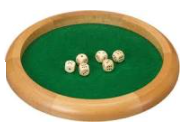

* `__init__`  asks for how many dices will be created, store those and then print'em.

* `dice_stack_printer`: Notice that i just print ANY object in the `__dices` list. I don't care if it is a `DN`, a `D4` or any other. In this, there at least one important concept: Duck Typing.   
"If it looks like a duck, swims like a duck, and quacks like a duck, then it probably is a duck."  
All dice objects have `__str__` implemented, so all of them must behave the same way.
  > For more information, look for [Duck Typing](https://en.wikipedia.org/wiki/Duck_typing) and [Polymorphism](https://en.wikipedia.org/wiki/Polymorphism_(computer_science)).


In [16]:
class Board:
    def __init__(self):
        self.__dices = []  # DN storage list
        print('Welcome do DN Simulator.\n'
              'Creating a new Board.\n'
              '--------------------------------')
        self.__max_dices = self.__how_many_dices()
        self.__dice_stack_creator()  # Create dices
        self.dice_stack_printer()  # Print created dices

    def __how_many_dices(self, min_number=1, max_number=9) -> int:
        """This method will use RegEx to ensure the input will be a number
        between min_number and max_number"""
        dice_quantity = int
        match = None
        pattern = re.compile(f'[{min_number}-{max_number}]')

        while match is None:
            dice_quantity = input('How many dices do you want? '
                                  f'[Min:{min_number} - '
                                  f'Max: {max_number}]') \
                .replace(' ', '')
            match = re.fullmatch(pattern, dice_quantity)

        return int(dice_quantity)

    def print_available_dices(self):
        """Print how many dices are available for creation"""
        if self.__remaining_dices() == 1:
            print(f'You have {self.__remaining_dices()} dice available')
        else:
            print(f'You have {self.__remaining_dices()} dices available')

    def __remaining_dices(self) -> int:
        """Return the number of available dices for creation"""
        return self.__max_dices - len(self.__dices)

    def __dice_stack_creator(self):
        """Create the Dices"""
        print('--------------------------------\n'
              'Creating Dices.\n'
              '1) Choose how many dices will be created;\n'
              '2) Choose how many sides those above will have.\n'
              '3) Repeat until there is no more dices left.\n'
              '--------------------------------')
        while self.__remaining_dices() > 0:
            self.print_available_dices()

            dice_quantity = int(self.__how_many_dices
                                (1, self.__remaining_dices()))
            dice_sides = int(self.__how_many_dice_sides())

            for index in range(dice_quantity):
                dice = Dice.creator(dice_sides)
                self.__dices.append(dice)
                # this is just for printing class name
                print(f'A {str(type(dice))[-4:-2]} was created!')

    def dice_stack_printer(self):
        """Print the Dices"""
        print('--------------------------------\n'
              'Printing Dices.\n'
              '--------------------------------')

        for dice in self.__dices:
            print(dice)

    def __how_many_dice_sides(self):
        """Using RegEx to ensure it will be a number between 3 and 20, as
        4 is the minimum number of planes for the same sided Pyramid
        20 is just an arbitrary maximum number"""

        pattern = re.compile('([4-9])|(1[0-9])|20')
        match = None
        while match is None:
            sides = input('How many sides your dice will have? '
                          '[Min:4 - Max: 20]').replace(' ', '')
            match = re.fullmatch(pattern, sides)

        return sides


#### RegEx

It is a way to search for a pattern in a string. I used it to make sure the only acceptable input would be numbers. I could use a lot of ifs, but it would not be elegant and probably hard to read.

> For more information, look for [Regular Expression](https://en.wikipedia.org/wiki/Regular_expression)

I like to use [RegEx Pal](https://www.regexpal.com/) for checking.

Note: This `\b` isn't in the code because it is already being enforced by the `.fullmatch()`.

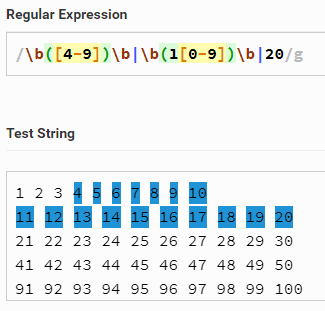

## Executing the programm

In [ ]:
board = Board()